In [1]:
from pathlib import Path
from pandas import DataFrame
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
registered_colors = {
    "Max": "tab:red",
    "Exposure-Based": "tab:blue",
    "NSW": "tab:purple",
    "0-NSW": "tab:purple",
    "1-NSW": "tab:orange",
    "0.5-NSW": "tab:brown",
    "2-NSW": "tab:green",
    "Uniform": "tab:gray",
}

In [3]:
metric_list = ["mean_max_envy", "pct_better_off", "pct_worse_off", "user_util"]
title_dict = {
    "mean_max_envy": "(a) Mean Max Envy",
    "pct_better_off": "(b) % Items Better Off",
    "pct_worse_off": "(c) % Items Worse Off",
    "user_util": "(d) User Utility",
}
log_path = Path("./logs/n_doc=50,n_query=100,lam=0.5,noise=0.05,K=5,exam=inv/")

## Varying Lambda

In [4]:
df = pd.read_csv(log_path / "varying_lambda" / "result_df.csv")
df = df.query("policy != 'nsw_0.5' and policy != 'nsw_1.0' and policy != 'nsw_2.0'")
legend = ["Max", "Exposure-Based", "NSW", "Uniform"]
palette = [registered_colors[l] for l in legend]

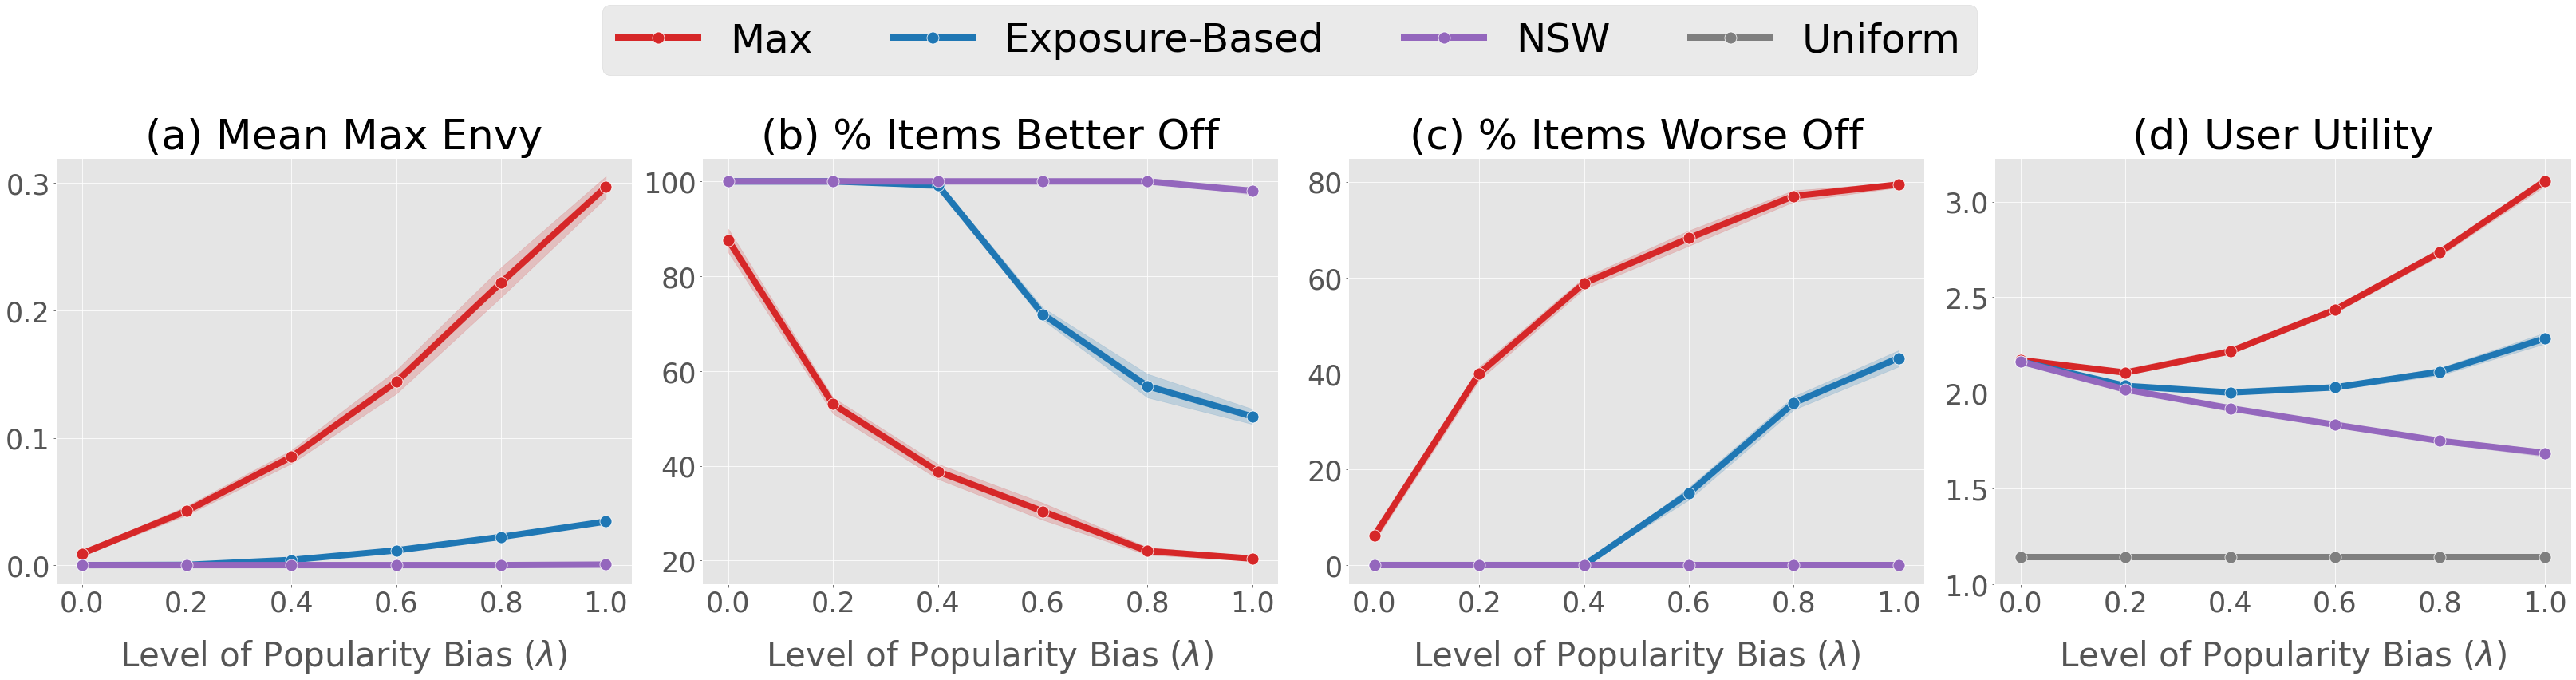

In [5]:
fig, ax = plt.subplots(1, 4, figsize=(45, 10), tight_layout=True)
for i, metric in enumerate(metric_list):
    ax_ = ax[i]
    sns.lineplot(
        marker="o",
        markersize=15,
        markers=True,
        linewidth=8,
        ax=ax_,
        x="lam",
        y=metric,
        hue="policy",
        legend=False,
        palette=palette,
        data=df,
    )
    # title
    ax_.set_title(title_dict[metric], fontsize=52)
    # yaxis
    ax_.set_ylabel("")
    if metric == "user_util":
        ax_.set_yticks([1.0, 1.5, 2.0, 2.5, 3.0])
    elif metric == "pct_better_off":
        ax_.set_ylim(15, 105)
        ax_.set_yticks([20, 40, 60, 80, 100])
    elif metric == "pct_worse_off":
        ax_.set_ylim(-4, 85)
        ax_.set_yticks([0, 20, 40, 60, 80])
    else:
        # ax_.set_yscale("log")
        ax_.set_ylim(-0.015, 0.32)
        ax_.set_yticks([0.0, 0.1, 0.2, 0.3])
    ax_.tick_params(axis="y", labelsize=35)
    ax_.yaxis.set_label_coords(-0.1, 0.5)
    # xaxis
    ax_.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax_.set_xlabel(r"Level of Popularity Bias ($\lambda$)", fontsize=42)
    ax_.tick_params(axis="x", labelsize=35)
    ax_.xaxis.set_label_coords(0.5, -0.125)
fig.legend(
    legend, fontsize=50, 
    bbox_to_anchor=(0.5, 1.12),
    ncol=4, loc="center",
)

## Varying Lambda with $\alpha$-NSW

In [6]:
df = pd.read_csv(log_path / "varying_lambda" / "result_df.csv")
df = df.query("policy != 'unif' and policy != 'max'")
df.sort_values(by=["policy"], inplace=True)
for metric in metric_list:
    baseline = df.groupby(["policy", "lam"]).mean()[metric]["expo-fair"]
    for lam in [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]:
        if baseline[lam] > 1e-5:
            df.loc[df["lam"] == lam, metric] /= baseline[lam]
legend = ["Exposure-Based", "0-NSW", "0.5-NSW", "1-NSW", "2-NSW"]
palette = [registered_colors[l] for l in legend]

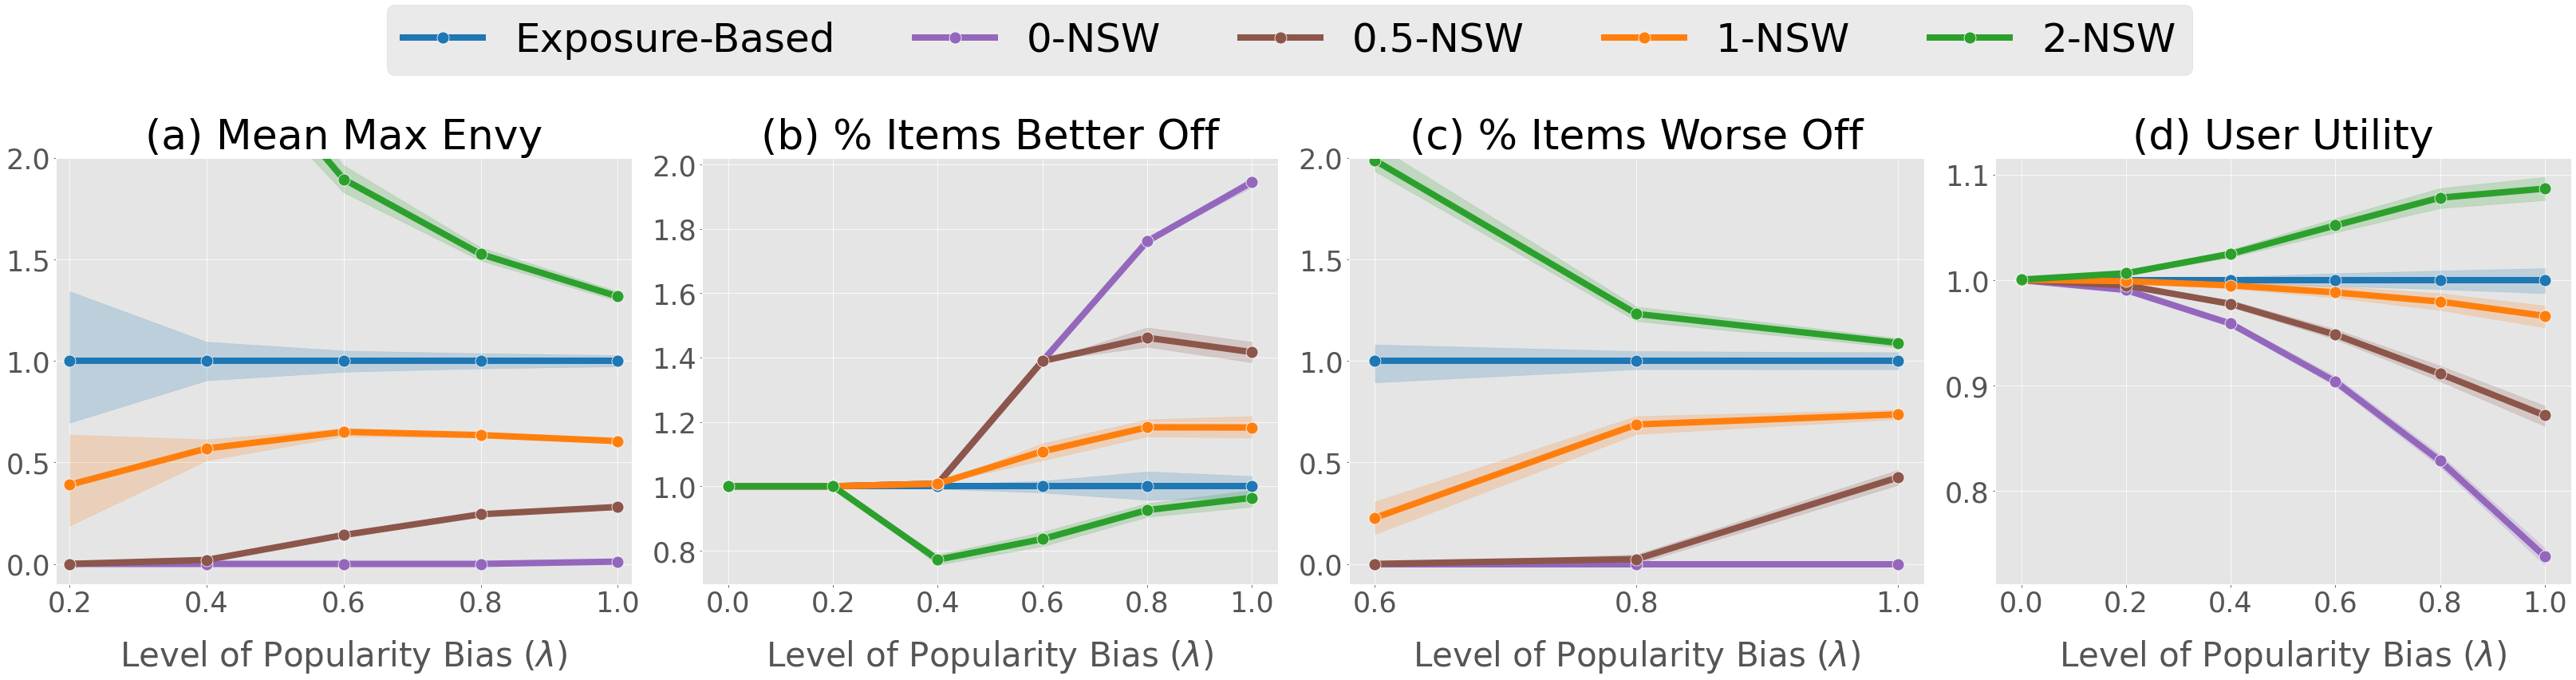

In [7]:
fig, ax = plt.subplots(1, 4, figsize=(45, 10), tight_layout=True)
for i, metric in enumerate(metric_list):
    if metric == "mean_max_envy":
        df_ = df.query("lam >= 0.2")
    elif metric == "pct_worse_off":
        df_ = df.query("lam >= 0.6")
    else:
        df_ = df
    ax_ = ax[i]
    sns.lineplot(
        marker="o",
        markersize=15,
        markers=True,
        linewidth=8,
        ax=ax_,
        x="lam",
        y=metric,
        hue="policy",
        legend=False,
        palette=palette,
        data=df_,
    )
    # title
    ax_.set_title(title_dict[metric], fontsize=52)
    # yaxis
    ax_.set_ylabel("")
    if metric == "mean_max_envy":
        ax_.set_ylim(-0.1, 2)
    ax_.tick_params(axis="y", labelsize=35)
    ax_.yaxis.set_label_coords(-0.1, 0.5)
    # xaxis
    if metric == "mean_max_envy":
        ax_.set_xlim(0.18, 1.02)
        ax_.set_xticks([0.2, 0.4, 0.6, 0.8, 1.0])
    elif metric == "pct_worse_off":
        ax_.set_ylim(-0.1, 2)
        ax_.set_xlim(0.58, 1.02)
        ax_.set_xticks([0.6, 0.8, 1.0])
    else:
        ax_.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax_.set_xlabel(r"Level of Popularity Bias ($\lambda$)", fontsize=42)
    ax_.tick_params(axis="x", labelsize=35)
    ax_.xaxis.set_label_coords(0.5, -0.125)
fig.legend(
    legend, fontsize=50, 
    bbox_to_anchor=(0.5, 1.12),
    ncol=5, loc="center",
)

## Varying Noise

In [8]:
df = pd.read_csv(log_path / "varying_noise" / "result_df.csv")
legend = ["Max", "Exposure-Based", "NSW", "Uniform"]
palette = [registered_colors[l] for l in legend]

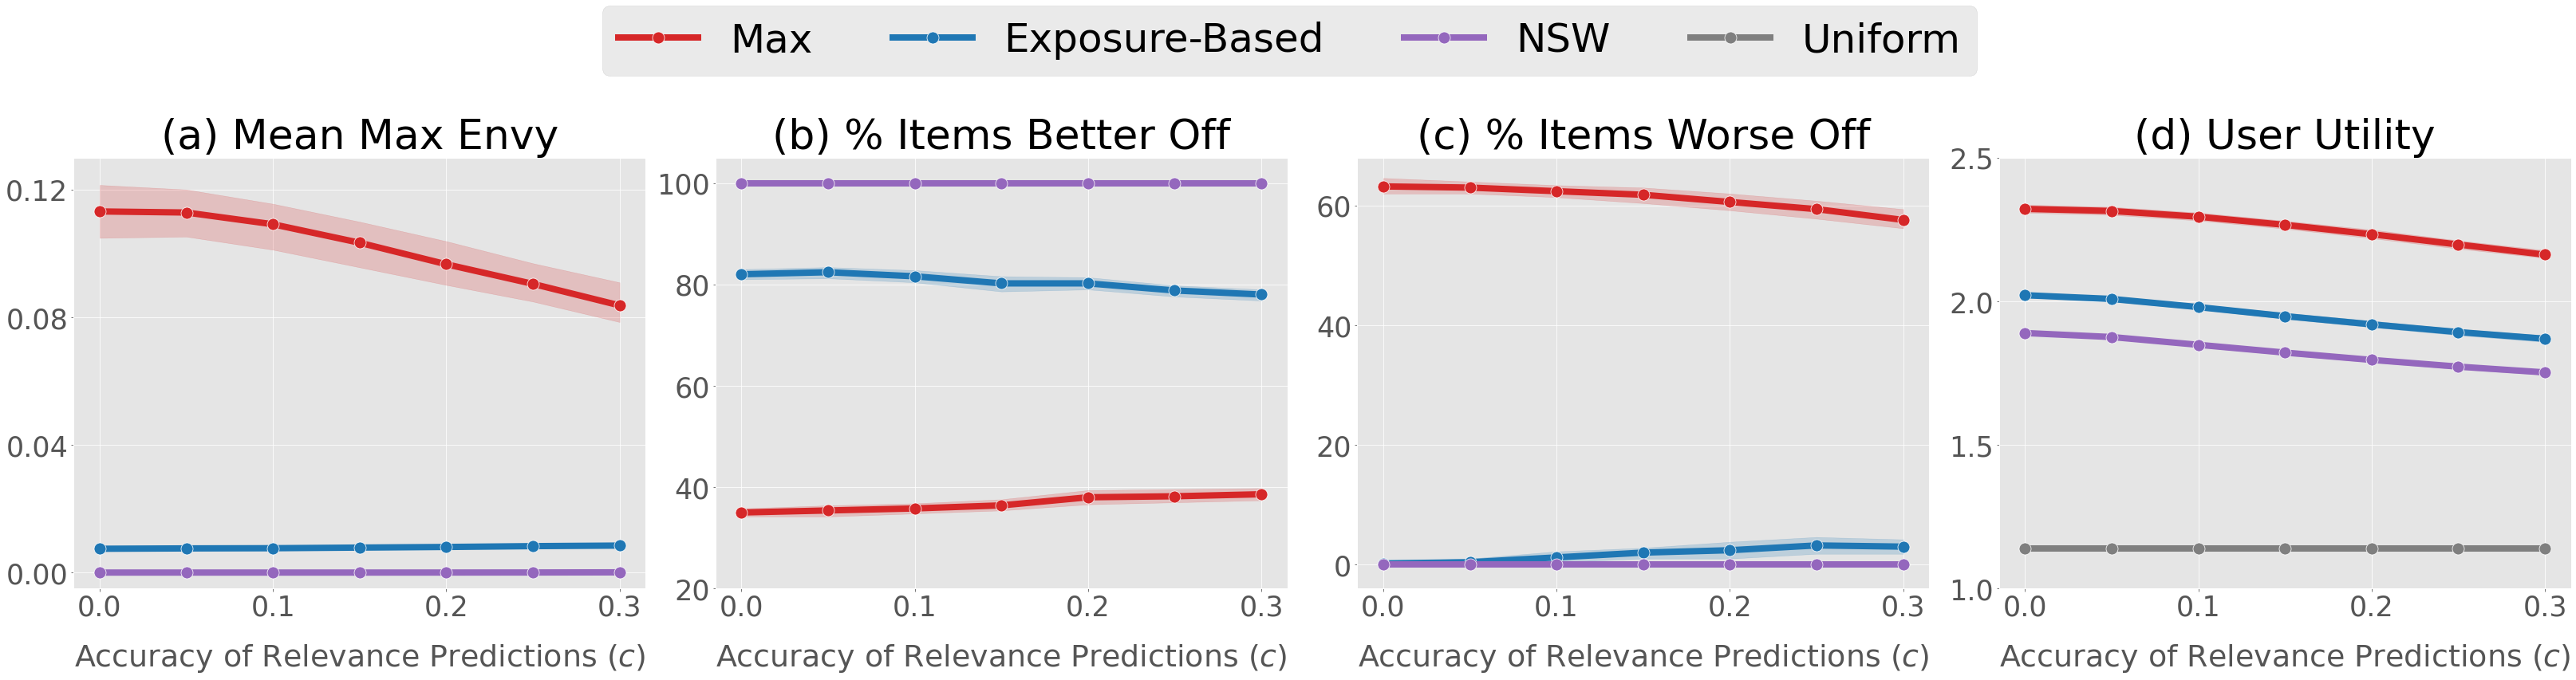

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(45, 10), tight_layout=True)
for i, metric in enumerate(metric_list):
    ax_ = ax[i]
    sns.lineplot(
        marker="o",
        markersize=15,
        markers=True,
        linewidth=8,
        ax=ax_,
        x="noise",
        y=metric,
        hue="policy",
        legend=False,
        palette=palette,
        data=df,
    )
    # title
    ax_.set_title(title_dict[metric], fontsize=52)
    # yaxis
    ax_.set_ylabel("")
    if metric == "user_util":
        ax_.set_yticks([1.0, 1.5, 2.0, 2.5])
    elif metric == "pct_better_off":
        ax_.set_ylim(35, 105)
        ax_.set_yticks([20, 40, 60, 80, 100])
    elif metric == "pct_worse_off":
        ax_.set_ylim(-4, 68)
        ax_.set_yticks([0, 20, 40, 60])
    else:
        ax_.set_ylim(-0.005, 0.13)
        ax_.set_yticks([0.0, 0.04, 0.08, 0.12])
    ax_.tick_params(axis="y", labelsize=35)
    ax_.yaxis.set_label_coords(-0.1, 0.5)
    # xaxis
    ax_.set_xticks([0.0, 0.1, 0.2, 0.3])
    ax_.set_xlabel(r"Accuracy of Relevance Predictions ($c$)", fontsize=38)
    ax_.tick_params(axis="x", labelsize=35)
    ax_.xaxis.set_label_coords(0.5, -0.125)
fig.legend(
    legend, fontsize=50, 
    bbox_to_anchor=(0.5, 1.12),
    ncol=4,loc="center",
)

## Varying K

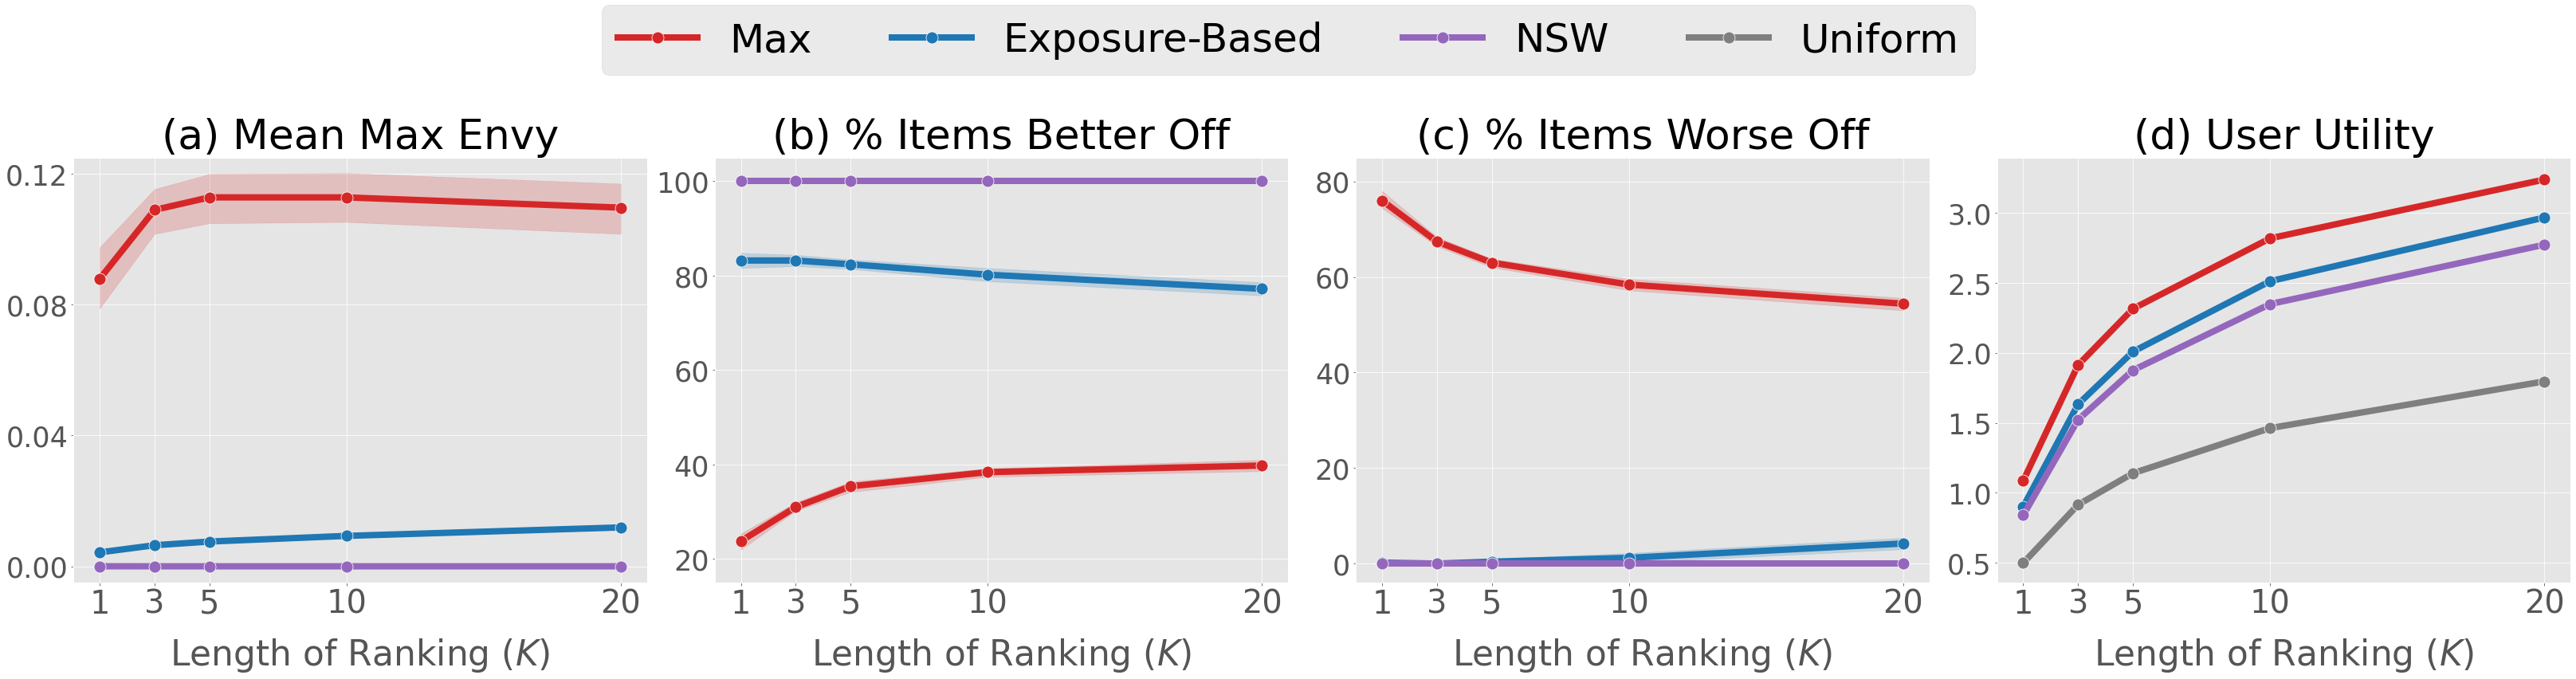

In [10]:
df = pd.read_csv(log_path / "varying_K" / "result_df.csv")
fig, ax = plt.subplots(1, 4, figsize=(45, 10), tight_layout=True)
for i, metric in enumerate(metric_list):
    ax_ = ax[i]
    sns.lineplot(
        marker="o",
        markersize=15,
        markers=True,
        linewidth=8,
        ax=ax_,
        x="K",
        y=metric,
        hue="policy",
        legend=False,
        palette=palette,
        data=df,
    )
    # title
    ax_.set_title(title_dict[metric], fontsize=52)
    # yaxis
    ax_.set_ylabel("")
    if metric == "pct_better_off":
        ax_.set_ylim(15, 105)
        ax_.set_yticks([20, 40, 60, 80, 100])
    elif metric == "pct_worse_off":
        ax_.set_ylim(-4, 85)
        ax_.set_yticks([0, 20, 40, 60, 80])
    elif metric == "mean_max_envy":
        ax_.set_ylim(-0.005, 0.125)
        ax_.set_yticks([0.0, 0.04, 0.08, 0.12])
    ax_.tick_params(axis="y", labelsize=35)
    ax_.yaxis.set_label_coords(-0.1, 0.5)
    # xaxis
    ax_.set_xticks([1, 3, 5, 10, 20])
    ax_.set_xlabel(r"Length of Ranking ($K$)", fontsize=44)
    ax_.tick_params(axis="x", labelsize=40)
    ax_.xaxis.set_label_coords(0.5, -0.125)
fig.legend(
    legend, fontsize=50, 
    bbox_to_anchor=(0.5, 1.12),
    ncol=4, loc="center",
)

## Varying Num Items

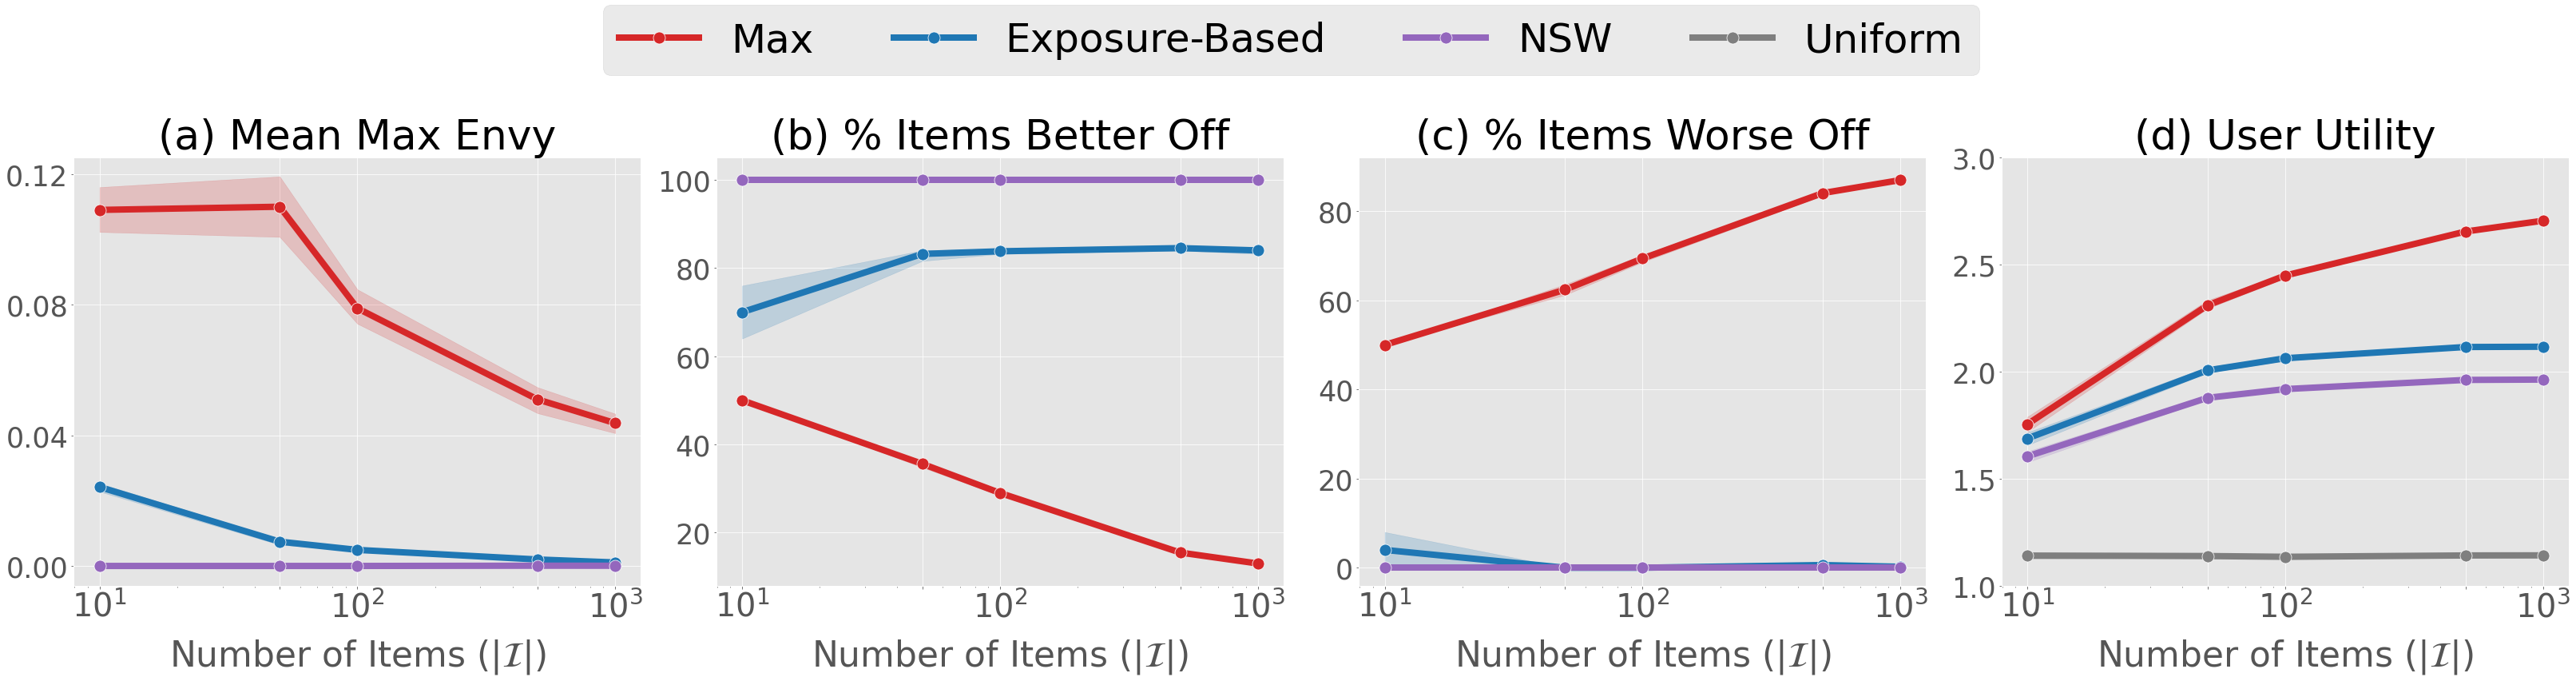

In [11]:
df = pd.read_csv(log_path / "varying_n_doc" / "result_df.csv")
fig, ax = plt.subplots(1, 4, figsize=(45, 10), tight_layout=True)
for i, metric in enumerate(metric_list):
    ax_ = ax[i]
    sns.lineplot(
        marker="o",
        markersize=15,
        markers=True,
        linewidth=8,
        ax=ax_,
        x="n_doc",
        y=metric,
        hue="policy",
        legend=False,
        palette=palette,
        data=df,
    )
    # title
    ax_.set_title(title_dict[metric], fontsize=52)
    # yaxis
    ax_.set_ylabel("")
    if metric == "user_util":
        ax_.set_yticks([1.0, 1.5, 2.0, 2.5, 3.0])
    elif metric == "pct_better_off":
        ax_.set_ylim(8, 105)
        ax_.set_yticks([20, 40, 60, 80, 100])
    elif metric == "pct_worse_off":
        ax_.set_ylim(-4, 92)
        ax_.set_yticks([0, 20, 40, 60, 80])
    elif metric == "mean_max_envy":
        ax_.set_ylim(-0.006, 0.125)
        ax_.set_yticks([0.0, 0.04, 0.08, 0.12])
    ax_.tick_params(axis="y", labelsize=35)
    ax_.yaxis.set_label_coords(-0.1, 0.5)
    # xaxis
    ax_.set_xscale("log")
    ax_.set_xticks([10, 50, 100, 500, 1000])
    ax_.set_xlabel(r"Number of Items ($|\mathcal{I}|$)", fontsize=44)
    ax_.tick_params(axis="x", labelsize=40)
    ax_.xaxis.set_label_coords(0.5, -0.12)
fig.legend(
    legend, fontsize=50, 
    bbox_to_anchor=(0.5, 1.12),
    ncol=4, loc="center",
)

## Exponential Examination Function

In [12]:
log_path = Path("./logs/n_doc=50,n_query=100,lam=0.5,noise=0.05,K=5,exam=exp/")
df = pd.read_csv(log_path / "varying_lambda" / "result_df.csv")
df = df.query("policy != 'nsw_0.5' and policy != 'nsw_1.0' and policy != 'nsw_2.0'")

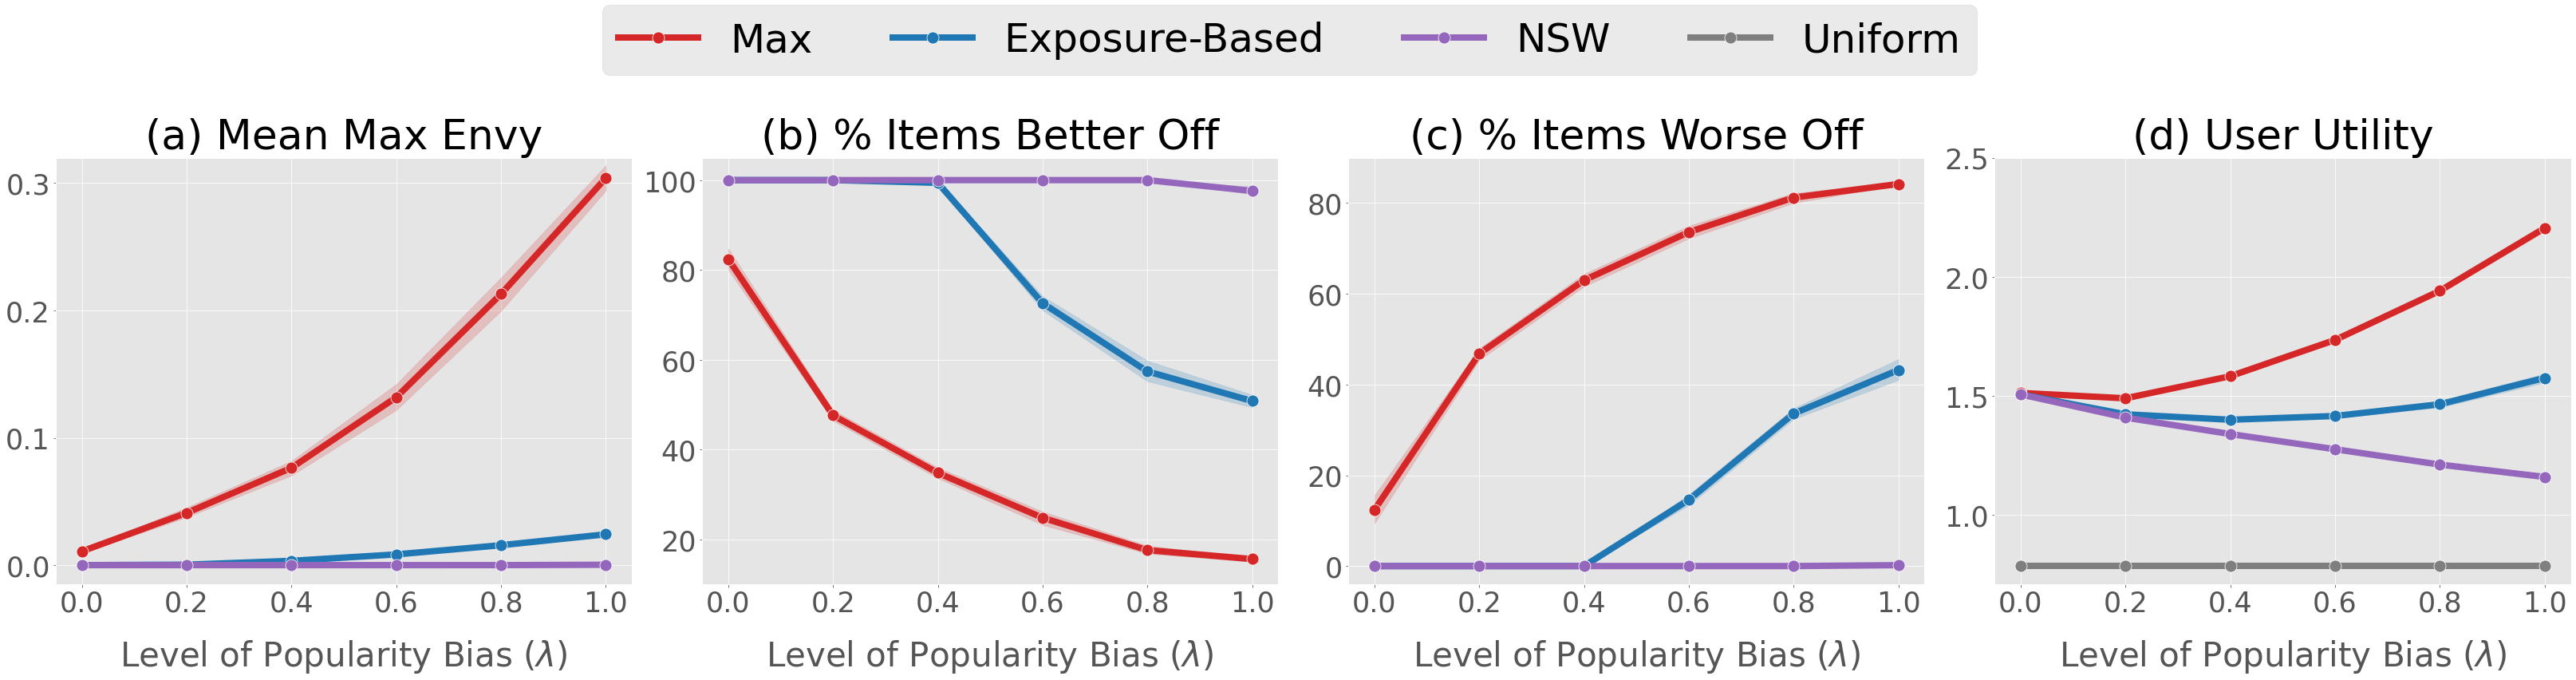

In [13]:
fig, ax = plt.subplots(1, 4, figsize=(45, 10), tight_layout=True)
for i, metric in enumerate(metric_list):
    ax_ = ax[i]
    sns.lineplot(
        marker="o",
        markersize=15,
        markers=True,
        linewidth=8,
        ax=ax_,
        x="lam",
        y=metric,
        hue="policy",
        legend=False,
        palette=palette,
        data=df,
    )
    # title
    ax_.set_title(title_dict[metric], fontsize=52)
    # yaxis
    ax_.set_ylabel("")
    if metric == "user_util":
        ax_.set_yticks([1.0, 1.5, 2.0, 2.5])
    elif metric == "pct_better_off":
        ax_.set_ylim(10, 105)
        ax_.set_yticks([20, 40, 60, 80, 100])
    elif metric == "pct_worse_off":
        ax_.set_ylim(-4, 90)
        ax_.set_yticks([0, 20, 40, 60, 80])
    elif metric == "mean_max_envy":
        ax_.set_ylim(-0.015, 0.32)
        ax_.set_yticks([0.0, 0.1, 0.2, 0.3])
    ax_.tick_params(axis="y", labelsize=35)
    ax_.yaxis.set_label_coords(-0.1, 0.5)
    # xaxis
    ax_.set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax_.set_xlabel(r"Level of Popularity Bias ($\lambda$)", fontsize=42)
    ax_.tick_params(axis="x", labelsize=35)
    ax_.xaxis.set_label_coords(0.5, -0.125)
fig.legend(
    legend, fontsize=50, 
    bbox_to_anchor=(0.5, 1.12),
    ncol=4, loc="center",
)